In [55]:
import pandas as pd
import numpy as np
import random
import math
import networkx as nx
import matplotlib.pyplot as plt

In [56]:
def gen_station_names(amount):
    """
    Creates names for stations given an amount of stations.
    """
    name_list = ['Root']
    for name in range(amount):
        name_list.append(chr(65 + name))
    return name_list

names = gen_station_names(5)
names

['Root', 'A', 'B', 'C', 'D', 'E']

In [57]:
def gen_locations(name_list):
    """
    Given a list of station names, generates random locations.
    """
    location_list = []
    max_xy = math.ceil(len(name_list) / 2)

    while len(location_list) < len(name_list):

        new_location = [np.random.randint(0, max_xy), np.random.randint(0, max_xy)]
        if new_location not in location_list:
            location_list.append(new_location)
    return location_list

locations = gen_locations(names)
print(len(names), len(locations))
locations

6 6


[[0, 1], [0, 2], [2, 1], [1, 1], [1, 0], [1, 2]]

In [58]:
set(tuple(item) for item in [[0,1], [1,0]]) - {(0,1)}

{(1, 0)}

In [59]:
def gen_connections(name_list, location_list):
    """
    Takes a list of names and corresponding locations and generates connections between them.
    """
    connection_list = []
    final_list = []

    for station in range(len(name_list)):
        # Finds for a station which other stations can be directly connected to it
        possible_connections = [location for location in location_list if location_list[station][0] == location[0]
                                 or location_list[station][1] == location[1]]
        
        # Removes the station itself
        possible_connections.remove(location_list[station])

        # If no stations can be connected, create a station which is can subsequently be connected with another station
        # TODO connect this station with this subsequent station /  fix that new stations don't get a connection_list
        if len(possible_connections) == 0:

            decider_var = random.choice([0,1])
            connecting_station = random.choice(location_list)

            # Append new station name
            name_list.append(chr(64 + len(name_list)))


            # Create random location for station which can connect to the current station and add it to location_list and connection_list
            if decider_var == 0:
                location_list.append([location_list[station][0], connecting_station[1]])
                connection_list.append([[location_list[station][0], connecting_station[1]]])
            else:
                location_list.append([connecting_station[0] , location_list[station][0]])
                connection_list.append([[connecting_station[0] , location_list[station][0]]])
                print('Succesfully added a station {} and connected it to {}'.format(name_list[-1], name_list[station]))
                
        else:
            # TODO add already existing elements to the made choice
            connection_list.append(random.sample(possible_connections, random.randint(1, len(possible_connections))))

    # TODO fix all the lines going trough a station without connecting
    # Renames the locations to station names
    
    mapping_dict = dict(zip(map(tuple, location_list), name_list))

    print('name_list: {}, location_list: {}, connection_list: {}'.format(name_list, location_list, connection_list))
    
    for connection in connection_list:
        final_list.append([mapping_dict[tuple(item)] for item in connection])
    return final_list
        


In [60]:
def plot_graph(df_stations):
    G = nx.Graph()

    # Add nodes to the graph
    for i, row in df_stations.iterrows():
        G.add_node(row['Station_names'], pos=row['Station_locations'])

    # Add edges to the graph
    for i, row in df_stations.iterrows():
        for dest in row['Connected_to']:
            G.add_edge(row['Station_names'], dest)

    # Get positions of nodes
    pos = nx.get_node_attributes(G, 'pos')

    # Plot the graph
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title('Subway')
    return plt

In [61]:
amount_stations = 10
test_names = gen_station_names(amount_stations)
test_locations = gen_locations(test_names)
test_connections = gen_connections(test_names, test_locations)

data = {
    'Station_names': test_names,
    'Station_locations': test_locations,
    'Connected_to': test_connections
}

df_stations = pd.DataFrame(data)
df_stations


name_list: ['Root', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], location_list: [[2, 4], [0, 4], [5, 2], [5, 4], [4, 5], [3, 3], [1, 4], [4, 4], [0, 2], [1, 0], [3, 1]], connection_list: [[[1, 4], [5, 4], [0, 4]], [[0, 2], [5, 4], [2, 4]], [[0, 2], [5, 4]], [[1, 4], [2, 4], [0, 4]], [[4, 4]], [[3, 1]], [[2, 4], [0, 4], [1, 0], [4, 4]], [[4, 5], [0, 4], [5, 4], [2, 4]], [[5, 2]], [[1, 4]], [[3, 3]]]


,Station_names,Station_locations,Connected_to
0,Root,"[2, 4]","[F, C, A]"
1,A,"[0, 4]","[H, C, Root]"
2,B,"[5, 2]","[H, C]"
3,C,"[5, 4]","[F, Root, A]"
4,D,"[4, 5]",[G]
5,E,"[3, 3]",[J]
6,F,"[1, 4]","[Root, A, I, G]"
7,G,"[4, 4]","[D, A, C, Root]"
8,H,"[0, 2]",[B]
9,I,"[1, 0]",[F]


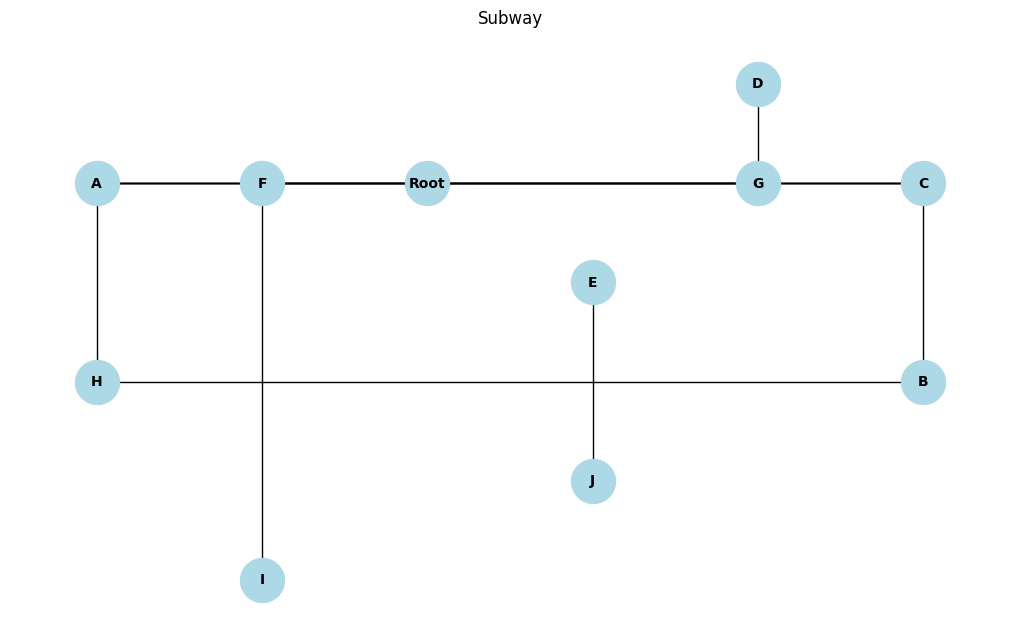

In [62]:
plot = plot_graph(df_stations)
plot.show()